In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [18]:
df = pd.read_csv("Housing.csv")

In [19]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [20]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

cols_to_scale = ["price", "area"]  # make sure these exist after cleaning
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

print(df.head())


      price      area  bedrooms  bathrooms  stories mainroad guestroom  \
0  4.566365  1.046726         4          2        3      yes        no   
1  4.004484  1.757010         4          4        4      yes        no   
2  4.004484  2.218232         3          2        2      yes        no   
3  3.985755  1.083624         4          2        2      yes        no   
4  3.554979  1.046726         4          1        2      yes       yes   

  basement hotwaterheating airconditioning  parking prefarea furnishingstatus  
0       no              no             yes        2      yes        furnished  
1       no              no             yes        3       no        furnished  
2      yes              no              no        2      yes   semi-furnished  
3      yes              no             yes        3      yes        furnished  
4      yes              no             yes        2       no        furnished  


In [21]:
X = df.drop(["price"], axis=1) # drop using list
X = pd.get_dummies(X, drop_first=True)
y = df["price"]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2) 

In [22]:
# MODELS 
DT_model = DecisionTreeRegressor(max_depth=5, random_state=42)
LR_model = LinearRegression()
RF_model = RandomForestRegressor(random_state=42, n_estimators=100)


In [23]:
LR_model.fit(X_train, y_train)

LinearRegression()

In [24]:
DT_model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5, random_state=42)

In [25]:
RF_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [26]:
# PREDICITON
y_pred_LR = DT_model.predict(X_test)
y_pred_DT = DT_model.predict(X_test)
y_pred_RF = RF_model.predict(X_test)

In [27]:
# FOR 
mae_DT = mean_absolute_error(y_test, y_pred_DT)
rmse_DT = np.sqrt(mean_squared_error(y_test, y_pred_DT))
r2_DT = r2_score(y_test, y_pred_DT)

Data_DecisionTree = np.array( [mae_DT, rmse_DT,r2_DT])
print(Data_DecisionTree)

[0.51301126 0.71880017 0.34617919]


In [28]:
mae_LR = mean_absolute_error(y_test, y_pred_LR)
rmse_LR = np.sqrt(mean_squared_error(y_test, y_pred_LR))
r2_LR = r2_score(y_test, y_pred_LR)

Data_linearRegression = np.array( [mae_LR, rmse_LR,r2_LR])
print(Data_linearRegression)

[0.51301126 0.71880017 0.34617919]


In [29]:
mae_RF = mean_absolute_error(y_test, y_pred_RF)
rmse_RF = np.sqrt(mean_squared_error(y_test, y_pred_RF))
r2_RF = r2_score(y_test, y_pred_RF)

Data_RandomForest = np.array( [mae_RF, rmse_RF,r2_RF])
print(Data_RandomForest)

[0.43513683 0.60545548 0.53611873]


In [30]:
data = np.vstack((Data_linearRegression, Data_DecisionTree, Data_RandomForest))  # stack row-wise
df = pd.DataFrame(data, index=["LinearRegression", "DecisionTree", "RandomForest"], columns = ["mae","rmse","r2"])
df


,mae,rmse,r2
LinearRegression,0.513011,0.718800,0.346179
DecisionTree,0.513011,0.718800,0.346179
RandomForest,0.435137,0.605455,0.536119


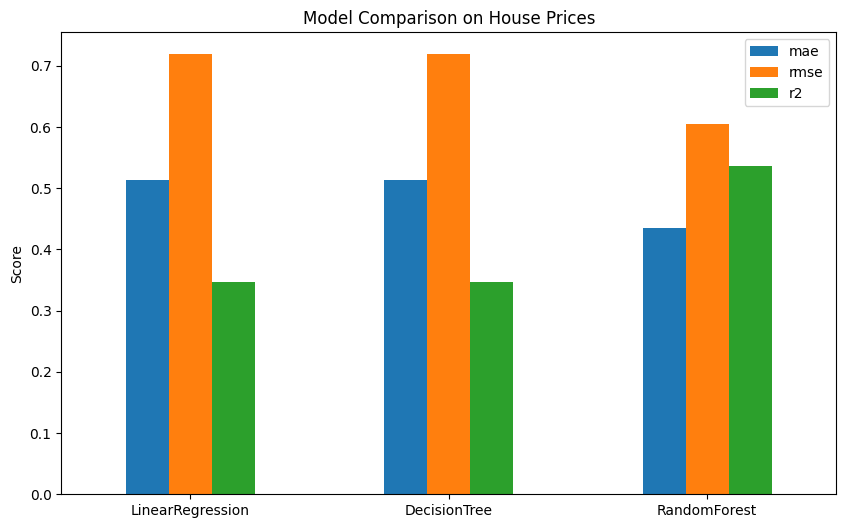

In [31]:
# Plot bar chart for all metrics
df.plot(kind="bar", figsize=(10,6))
plt.title("Model Comparison on House Prices")
plt.ylabel("Score")
plt.xticks(rotation=0)
plt.show()


*RANDOM FOREST IS THE BEST*  
Because, It had the lowest MAE and RMSE, meaning its predictions were closer to the actual house prices.
It also had the highest R² score , explaining much more variance than Linear Regression or a single Decision Tree .


*TRADE-OFF:*  
Linear Regression was very fast and easy to interpret, but its accuracy was poor.
Decision Tree was interpretable, but it lacked accuracy.
Random Forest gave the best accuracy, but it was slower to train.

*IMPROVEMENT:*  
We can use hyper-parameter tuning, to get more accurate results.
we can also use more advanced algorithms like XGBoost for better performance.

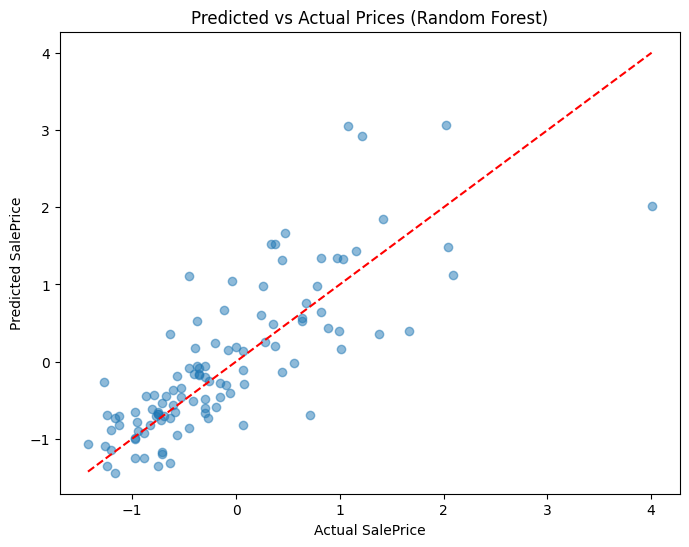

In [32]:

# Predictions
y_pred_best = RF_model.predict(X_test)

# Scatter plot
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_best, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--")  # diagonal
plt.xlabel("Actual SalePrice")
plt.ylabel("Predicted SalePrice")
plt.title(f"Predicted vs Actual Prices ({'Random Forest'})")
plt.show()
